# Este es el EDA del proyecto individual 2 de Henry - Data Analytics

MOOCs : Massive Open Online Courses

Alumno: Fernando Embrioni

Junio 2023

In [62]:
# Imports
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize
from langdetect import detect_langs
import langcodes
import seaborn as sns
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fernandoembrioni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Análisis del dataset udemy_courses.csv

In [2]:
udemy_df = pd.read_csv('../data/udemy_courses.csv')

In [3]:
udemy_df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
udemy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


- No Hay nulos. Procedo con los descartes de columnas y la actualizacion del tipo de datos en las columnas que haga falta

In [5]:
# Descarto course_id
udemy_df.drop(['course_id'], axis=1, inplace=True)

# Cambio la fecha de publicacion a formato fecha
udemy_df['published_timestamp'] = udemy_df['published_timestamp'].astype('datetime64[ns]')

In [6]:
udemy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   course_title         3678 non-null   object        
 1   url                  3678 non-null   object        
 2   is_paid              3678 non-null   bool          
 3   price                3678 non-null   int64         
 4   num_subscribers      3678 non-null   int64         
 5   num_reviews          3678 non-null   int64         
 6   num_lectures         3678 non-null   int64         
 7   level                3678 non-null   object        
 8   content_duration     3678 non-null   float64       
 9   published_timestamp  3678 non-null   datetime64[ns]
 10  subject              3678 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 291.1+ KB


- Examino cuáles son las palabras más utilizadas en los títulos de los cursos que son gratuitos y luego en los que son pagos

Analizo los titulos de los cursos gratuitos

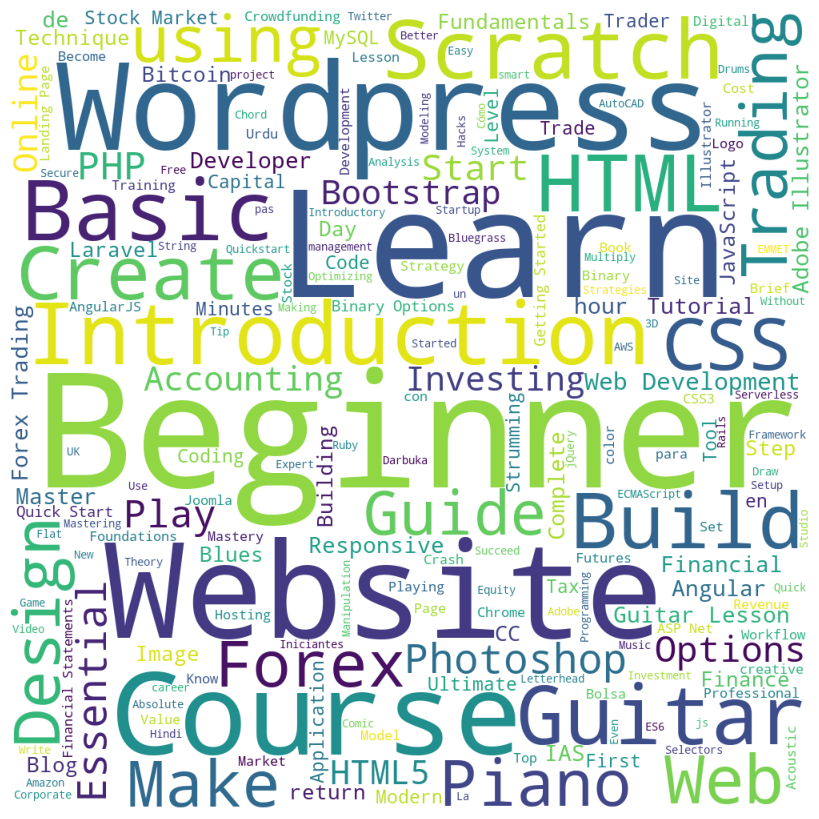

In [7]:
# Preparo el texto para un wordcloud de los títulos de los cursos gratuitos
text = udemy_df[udemy_df['is_paid'] == False].course_title.str.cat(sep=' ')

# Armo y presento el wordcloud
wordcloud = WordCloud(width=1000, height=1000, background_color="White",min_font_size=8).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
# Defino mis stopwords con algunos signos y palabras
mis_stopwords = ['-', '&', 'The', 'A', 'To', 'For', '', 'And', '4']

In [9]:
# Preparo la lista de palabras de los títulos de los cursos gratuitos
word_list = []
udemy_df[udemy_df['is_paid'] == False].course_title.apply(lambda x: word_list.extend(x.split(' ')))

# Quito las stopwords del idioma Inglés (Aparentemente todos los cursos son en Inglés)
a=set(stopwords.words('english'))
word_list = [palabra for palabra in word_list if palabra not in a]

# Quito las stopwords que definí
a=set(mis_stopwords)
word_list = [palabra for palabra in word_list if palabra not in a]

# Cuento, ordeno y presento las palabras
contador = Counter(word_list)
contador = dict(contador)
contador = dict(sorted(contador.items(), key=lambda x: x[1], reverse=True))
print(contador)

{'Learn': 38, 'How': 30, 'Beginners': 24, 'Website': 22, 'Course': 20, 'Guitar': 20, 'Introduction': 18, 'Web': 17, 'Trading': 16, 'HTML': 16, 'Wordpress': 16, 'Forex': 15, 'Build': 14, 'Scratch': 14, 'Create': 13, 'CSS': 13, 'Options': 12, 'Basics': 12, 'From': 12, 'Your': 12, 'Make': 11, 'Design': 10, 'Beginner': 10, 'Start': 9, 'Photoshop': 9, 'Piano': 9, 'WordPress': 9, 'Development': 9, 'Financial': 8, 'using': 8, 'Illustrator': 8, 'Adobe': 8, 'PHP': 8, 'Bootstrap': 7, '2017': 7, 'HTML5': 7, 'Market': 6, 'Online': 6, 'Binary': 6, 'IAS': 6, 'Guide': 6, 'With': 6, 'de': 6, 'Essentials': 6, 'Master': 6, 'Lessons': 6, 'Play': 6, 'Page': 6, 'Angular': 6, 'Responsive': 6, 'Complete': 6, 'Stock': 5, 'Investing': 5, 'Fundamentals': 5, 'Accounting': 5, '2': 5, 'Bitcoin': 5, 'Quick': 5, 'Up': 5, '3': 5, 'Building': 5, 'Websites': 5, 'Laravel': 5, '101': 4, 'Minutes': 4, 'Capital': 4, 'Tax': 4, 'Trade': 4, '10': 4, "Beginner's": 4, 'en': 4, 'CC': 4, 'By': 4, '5': 4, 'First': 4, 'Blues': 4, '

Las 10 palabras más usadas como títulos de cursos gratuitos son:

Learn, How, Beginners, Website, Course, Guitar, Introduction, Web, Trading y HTML

Analizo los titulos de los cursos pagos

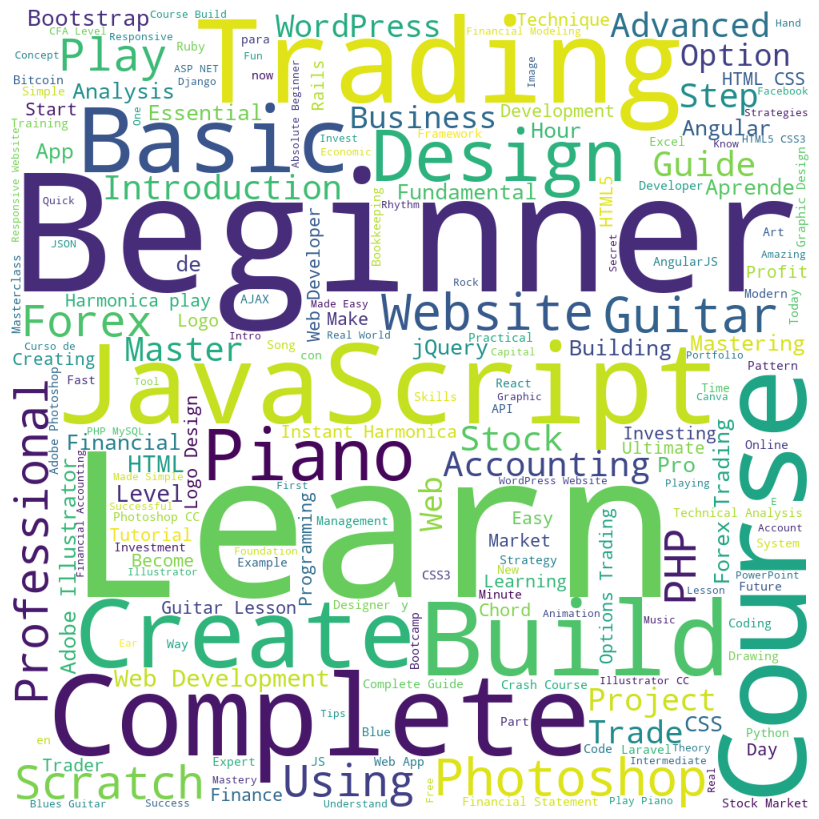

In [10]:
# Preparo el texto para un wordcloud de los títulos de los cursos pagos
text = udemy_df[udemy_df['is_paid'] == True].course_title.str.cat(sep=' ')

# Armo y presento el wordcloud
wordcloud = WordCloud(width=1000, height=1000, background_color="White",min_font_size=8).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [11]:
# Preparo la lista de palabras de los títulos de los cursos pagos
word_list = []
udemy_df[udemy_df['is_paid'] == True].course_title.apply(lambda x: word_list.extend(x.split(' ')))

# Quito las stopwords del idioma Inglés (Aparentemente todos los cursos son en Inglés)
a=set(stopwords.words('english'))
word_list = [palabra for palabra in word_list if palabra not in a]

# Quito las stopwords que definí
a=set(mis_stopwords)
word_list = [palabra for palabra in word_list if palabra not in a]

# Cuento, ordeno y presento las palabras
contador = Counter(word_list)
contador = dict(contador)
contador = dict(sorted(contador.items(), key=lambda x: x[1], reverse=True))
print(contador)

{'Learn': 453, 'Trading': 238, 'How': 212, 'Web': 188, 'Beginners': 177, 'Complete': 174, 'Course': 173, 'Guitar': 173, 'Design': 162, 'Piano': 152, 'Build': 145, 'Photoshop': 135, 'Forex': 133, 'Financial': 130, 'Create': 121, 'JavaScript': 109, 'Beginner': 108, 'Your': 107, 'Guide': 106, 'Accounting': 96, 'With': 92, 'Play': 92, 'Adobe': 92, 'Development': 91, 'de': 90, 'From': 89, 'HTML': 89, 'PHP': 87, 'Website': 86, 'Options': 85, 'Master': 84, '2': 76, '1': 75, ':': 73, 'Illustrator': 73, 'Advanced': 72, 'Introduction': 71, 'WordPress': 71, 'CSS': 70, 'Professional': 66, 'Easy': 65, 'Analysis': 63, 'Basics': 63, 'Lessons': 63, 'Stock': 60, 'Trade': 60, 'Scratch': 60, 'play': 58, 'Business': 57, 'Level': 57, 'Bootstrap': 56, 'Using': 52, 'Building': 51, 'HTML5': 51, 'Mastering': 50, 'Angular': 50, 'Logo': 49, 'Instant': 49, 'Harmonica': 49, 'Aprende': 47, 'In': 46, 'beginners': 46, '3': 45, 'Pro': 43, 'CC': 43, 'Stocks': 42, 'Developer': 41, 'Market': 40, 'App': 40, 'Projects': 40

Las 10 palabras más usadas como títulos de cursos pagos son:

Learn, Trading, How, Web, Beginners, Complete, Course, Guitar, Design y Piano

Conclusión: No hay mucha diferencia entre las palabras utilizadas en los títulos de los cursos gratuitos versus los de los cursos pagos.

> Cursos gratuitos: `Learn`, `How`, `Beginners`, Website, `Course`, `Guitar`, Introduction, `Web`, `Trading` y HTML

> Cursos pagos: `Learn`, `Trading`, `How`, `Web`, `Beginners`, Complete, `Course`, `Guitar`, Design y Piano

Quizás esto indique que pudieran existir `versiones gratuitas de cursos pagos, que sirvan como enganche` para suscribir a los estudiantes a las versiones pagas. Más adelante evaluaré esta posibilidad.

### Analizo la correlación entre variables numéricas

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


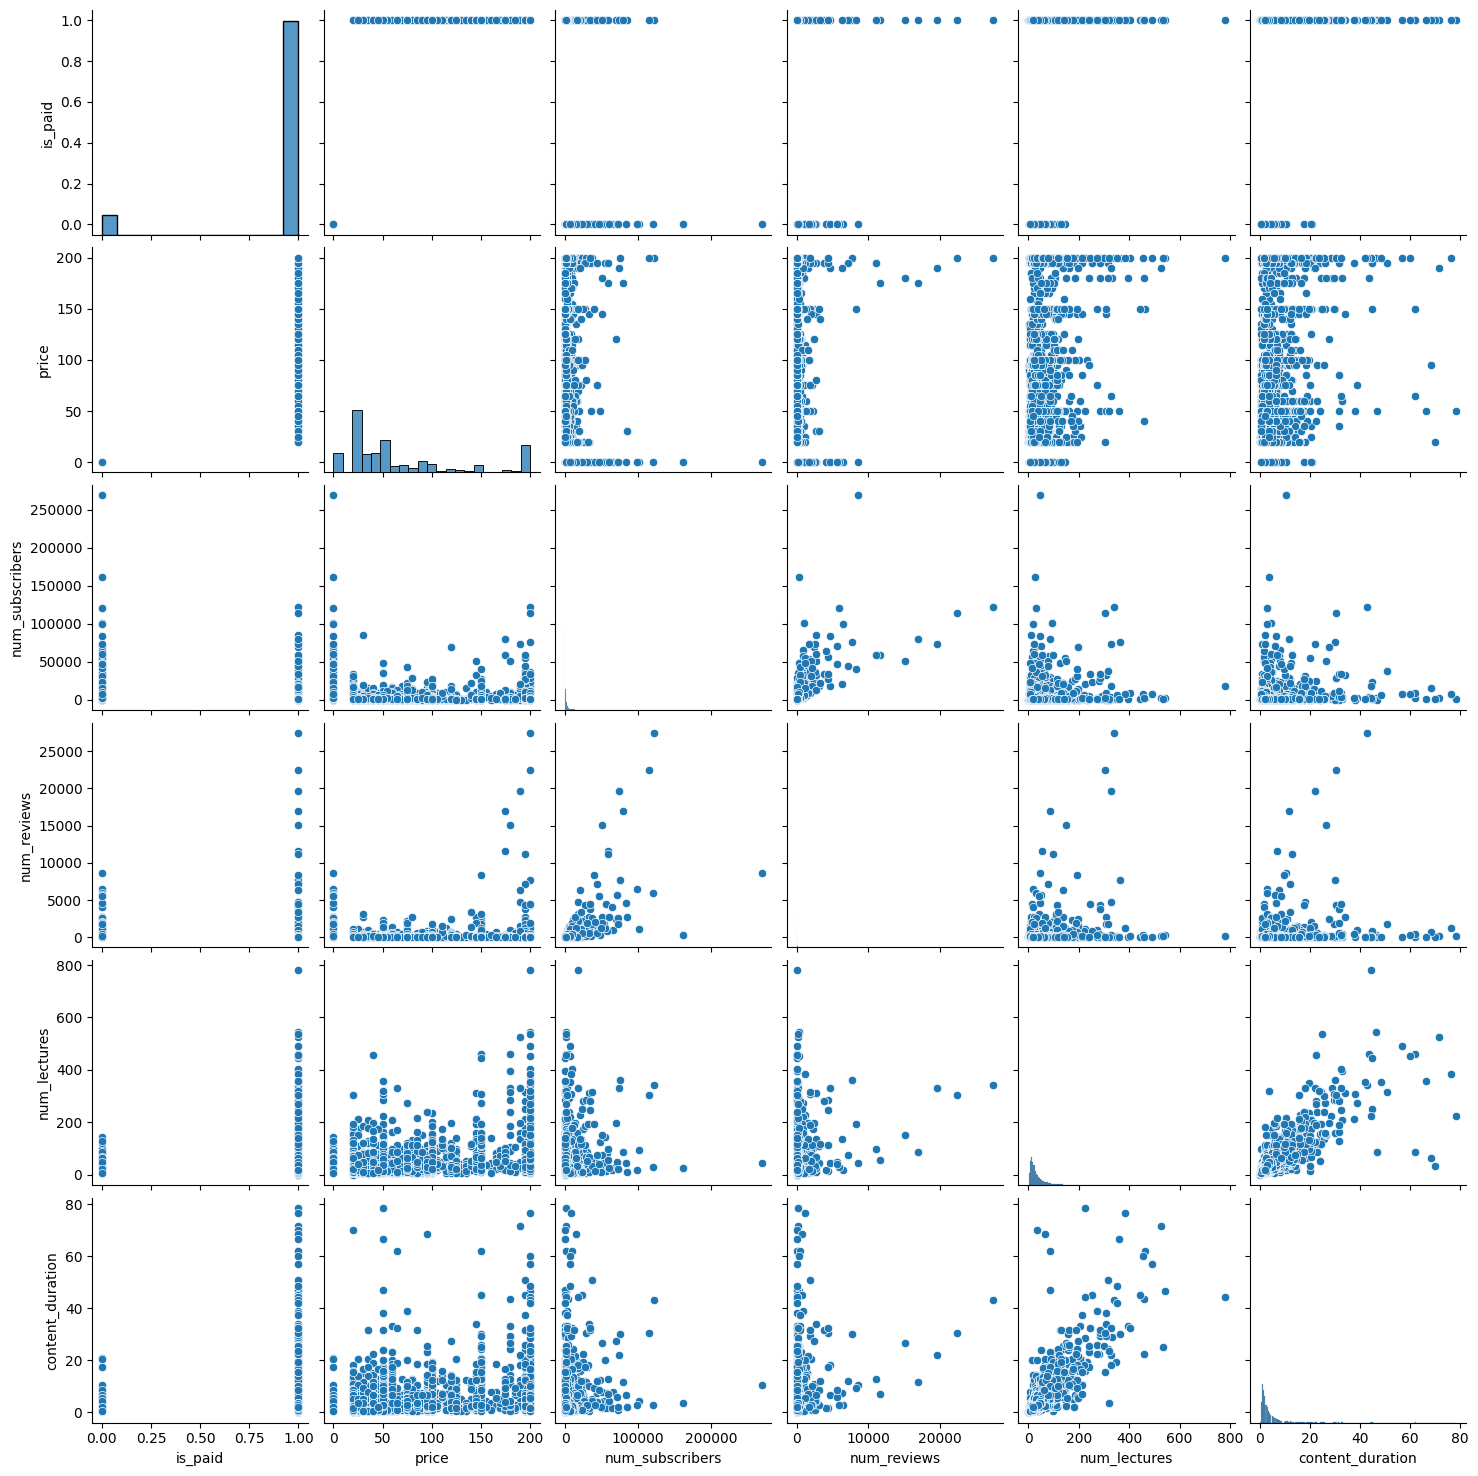

In [12]:
sns.pairplot(data=udemy_df)

Del pairplot anterior obtengo las siguientes conclusiones:

- Los precios de los cursos pagos están en un rango aproximado de entre 25 y 200 usd.

- Salvo por los outliers, la cantidad de suscriptores de los cursos gratuitos y de los cursos pagos es similar (Hasta 125000 suscriptores en los casos más altos, superando esta cifra algunos de los cursos gratuitos).

- Varios cursos pagos superan las 10000 reviews (con hasta 25000 reviews) que es el máximo de reviews que tienen los cursos gratuitos.

- `Los cursos pagos suelen superar ampliamente la cantidad de lectures frente a los gratuitos` por hasta el doble o el triple del máximo de lectures en estos últimos.

- `La duración de los cursos pagos también suele superar a la de los cursos gratuitos` por hasta el cuádruple de estos últimos.

- En general, el rango de precios de los cursos pagos se encuentra entre los 20 y los 60 usd. Estando otra parte importante en el rango de los 200 usd y una parte menor en el rango de 10 usd.

Analizo los cursos pagos en relación a su precio, lectures y duración

In [13]:
udemy_pagos_df = udemy_df[udemy_df['is_paid']]
udemy_pagos_df[['price', 'content_duration', 'num_lectures']]

,price,content_duration,num_lectures
0,200,1.5,51
1,75,39.0,274
2,45,2.5,51
3,95,3.0,36
4,200,2.0,26
...,...,...,...
3673,100,2.0,21
3674,25,3.5,42
3675,40,3.5,48
3676,50,3.0,38


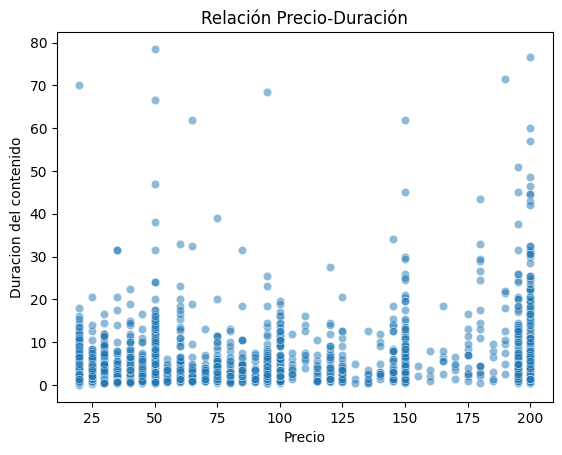

In [14]:
# Creo un scatter para relacionar Precio y Duración del contenido
sns.scatterplot(x=udemy_pagos_df['price'], y=udemy_pagos_df['content_duration'], alpha=0.5)

# Add labels and title
plt.xlabel('Precio')
plt.ylabel('Duracion del contenido')
plt.title('Relación Precio-Duración')

# Display the plot
plt.show()

- No parece haber una relación lineal entre precio y duración del contenido. De hecho, se podría decir que en general, con independencia del precio, la duración del contenido está entre las "0" y 20 Hs.

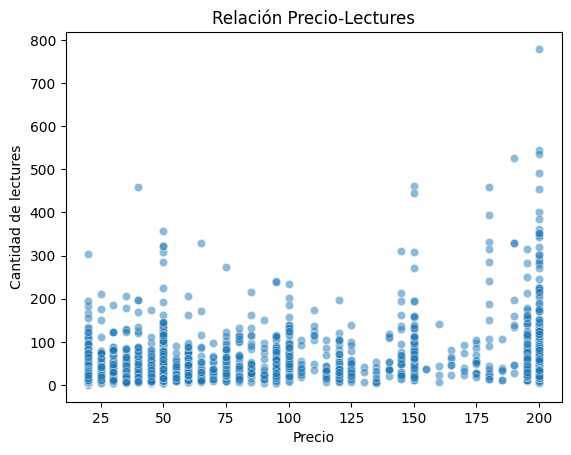

In [15]:
# Creo un scatter para relacionar Precio y Lectures
sns.scatterplot(x=udemy_pagos_df['price'], y=udemy_pagos_df['num_lectures'], alpha=0.5)

# Add labels and title
plt.xlabel('Precio')
plt.ylabel('Cantidad de lectures')
plt.title('Relación Precio-Lectures')

# Display the plot
plt.show()

- No parece haber una relación lineal entre precio y lectures. De hecho, se podría decir que en general, con independencia del precio, la cantidad de lectures está entre las "0" y 200.

Analizo correlaciones

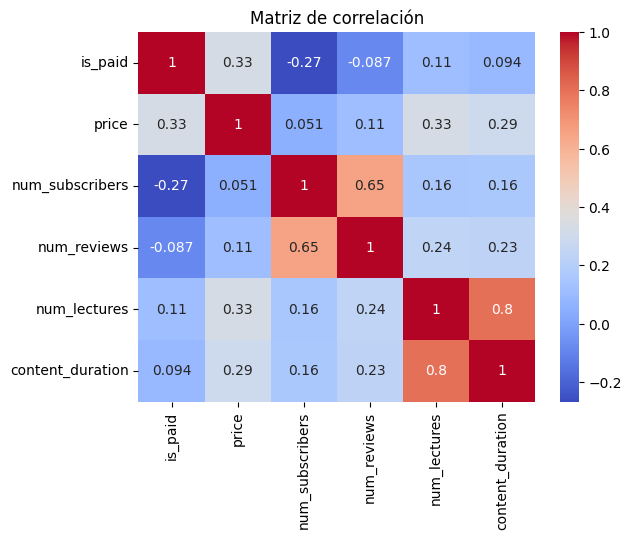

In [16]:
# Preparo la matriz de correlaciones
matriz_corr = udemy_df.corr(numeric_only=True)

# Muestro la matriz
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm')

# Agrego un título
plt.title('Matriz de correlación')

# Muestro la gráfica
plt.show()

- Salvo correlaciones obvias como las de cantidad de lectures y duración del contenido, y número de suscriptores y número de reviews, no se encuentran otras correlaciones que permitan determinar si un curso es o no pago.

Analizo la evolución en el tiempo

In [17]:
# Preparo campos de fecha
udemy_df['published_year'] = udemy_df['published_timestamp'].dt.year
udemy_df['published_month'] = udemy_df['published_timestamp'].dt.month
udemy_df['published_yyyymm'] = udemy_df['published_year'].astype(str) + '-' + ('0' + udemy_df['published_month'].astype(str)).str[-2:]

In [18]:
# Calculo el promedio de suscriptores por mes entre cursos gratuitos y cursos pagos
udemy_x_mes_df = udemy_df[['published_yyyymm', 'is_paid', 'num_subscribers']].groupby(['is_paid', 'published_yyyymm'],as_index=False).mean()
udemy_x_mes_df.sort_values(by=['published_yyyymm', 'is_paid'], inplace=True)

In [19]:
# Calculo cual es la máxima cantidad de registros a plotear en el eje x
registros_paid = udemy_x_mes_df[udemy_x_mes_df['is_paid'] == True].is_paid.count()
registros_free = udemy_x_mes_df[udemy_x_mes_df['is_paid'] == False].is_paid.count()
registros_max = max(registros_paid, registros_free)

# Y las etiquetas que deben imprimirse en el eje x
etiquetas = udemy_x_mes_df['published_yyyymm'].unique()
etiquetas = np.sort(etiquetas)

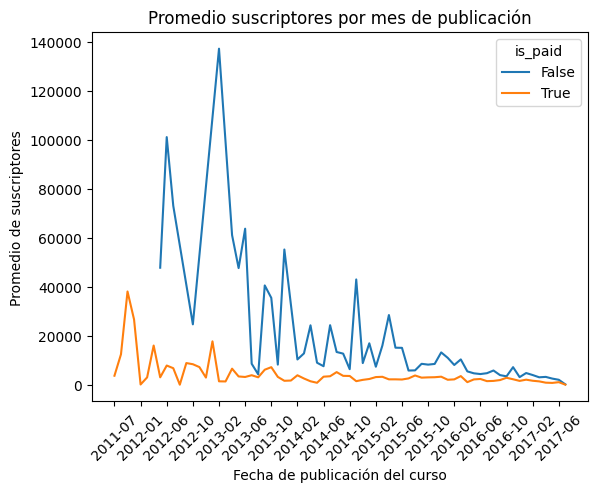

In [20]:
# Creo el gráfico de serie de tiempo
sns.lineplot(x='published_yyyymm', y='num_subscribers', hue='is_paid', data=udemy_x_mes_df)

# Roto a 45 grados las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45)

# Me quedo sólo con algunos valores de las etiquetas del eje x para una mejor visibilidad
lista_indices_eje_x = []
ratio_eje_x = 4 # Imprimo etiquetas cada 4 valores en el eje x
for i in range(registros_max):
    if i % ratio_eje_x == 0:
        lista_indices_eje_x.append(i)
plt.xticks(lista_indices_eje_x, [etiquetas[i] for i in lista_indices_eje_x])

# Agrego etiquetas y título
plt.xlabel('Fecha de publicación del curso')
plt.ylabel('Promedio de suscriptores')
plt.title('Promedio suscriptores por mes de publicación')

# Muestro el gráfico
plt.show()

- Tanto para los cursos gratuitos como para los cursos pagos, la cantidad de suscriptores aumenta cuanto más antiguo es el curso. Esto da un indicio de que la `cantidad de reviews (num_reviews) podría ser determinante para aumentar la cantidad de suscriptores`.

- Otra posible explicación para el decrecimiento de la cantidad promedio de suscriptores por mes sería que al haber más oferta de cursos, los mismos se repartirían entre más cursos.

De lo expresado más arriba, surgen las siguientes consultas que exploraré más abajo:

- `Pregunta 1` : En total, la cantidad de suscriptores aumenta o disminuye con el tiempo?

- `Pregunta 2` : En ingresos totales (num_subscribers * price), este valor aumenta o disminuye con el tiempo?

- `Pregunta 3` : La oferta de cursos, aumenta o disminuye con el tiempo?

- `Pregunta 4` : Influye la cantidad de reviews en la decisión de suscripción a cursos gratuitos y a cursos pagos? P.Ej. comparando el incremento/decremento de reviews en el mes anterior con el incremento/decremento de suscripciones en el mes actual por cada categoría (Para responder con Power BI)

Pregunta 1 : La cantidad de suscriptores aumenta o disminuye con el tiempo?

In [21]:
# Calculo el total de suscriptores por mes entre cursos gratuitos y cursos pagos
udemy_x_mes_df = udemy_df[['published_yyyymm', 'is_paid', 'num_subscribers']].groupby(['is_paid', 'published_yyyymm'],as_index=False).sum()
udemy_x_mes_df.sort_values(by=['published_yyyymm', 'is_paid'], inplace=True)

In [22]:
# Calculo cual es la máxima cantidad de registros a plotear en el eje x
registros_paid = udemy_x_mes_df[udemy_x_mes_df['is_paid'] == True].is_paid.count()
registros_free = udemy_x_mes_df[udemy_x_mes_df['is_paid'] == False].is_paid.count()
registros_max = max(registros_paid, registros_free)

# Y las etiquetas que deben imprimirse en el eje x
etiquetas = udemy_x_mes_df['published_yyyymm'].unique()
etiquetas = np.sort(etiquetas)

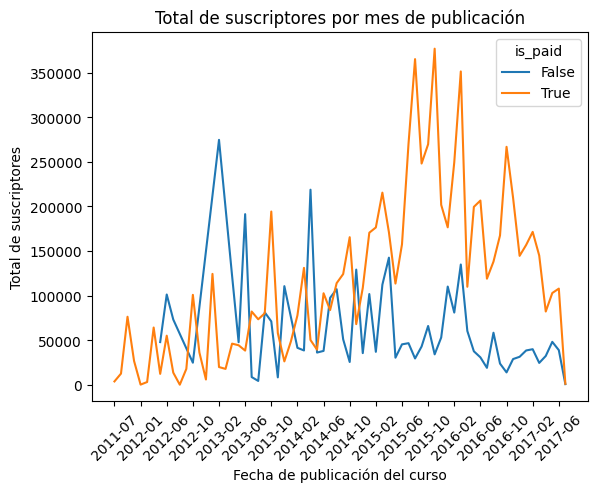

In [23]:
# Creo el gráfico de serie de tiempo
sns.lineplot(x='published_yyyymm', y='num_subscribers', hue='is_paid', data=udemy_x_mes_df)

# Roto a 45 grados las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45)

# Me quedo sólo con algunos valores de las etiquetas del eje x para una mejor visibilidad
lista_indices_eje_x = []
ratio_eje_x = 4 # Imprimo etiquetas cada 4 valores en el eje x
for i in range(registros_max):
    if i % ratio_eje_x == 0:
        lista_indices_eje_x.append(i)
plt.xticks(lista_indices_eje_x, [etiquetas[i] for i in lista_indices_eje_x])

# Agrego etiquetas y título
plt.xlabel('Fecha de publicación del curso')
plt.ylabel('Total de suscriptores')
plt.title('Total de suscriptores por mes de publicación')

# Muestro el gráfico
plt.show()

- Puede verse aquí que la cantidad total de suscriptores pagos es bastante alta para cursos liberados entre mediados de 2015 y fines de 2016. Considerando que tenemos datos hasta Julio de 2017, `esto podría reforzar la idea de que los reviews previos podrían sustentar la adopción de los suscriptores por los cursos pagos`.

- Es interesante notar también que la suscripción a cursos gratuitos ha ido declinando a medida que la fecha de publicación del curso aumenta. Esto podría indicar que `la plataforma Udemy encontró una forma de ser más eficiente`.

Pregunta 2 : En ingresos totales (num_subscribers * price), este valor aumenta o disminuye con el tiempo?

In [24]:
# Calculo el revenue total por mes entre cursos pagos
udemy_pagos_df = udemy_df[udemy_df['is_paid'] == True]
udemy_pagos_df['revenue'] = udemy_pagos_df['num_subscribers'] * udemy_pagos_df['price']
udemy_x_mes_df = udemy_pagos_df[['published_yyyymm', 'revenue']].groupby(['published_yyyymm'],as_index=False).sum()
udemy_x_mes_df.sort_values(by=['published_yyyymm'], inplace=True)

/var/folders/98/6bmv0tnx3l7c05z7h85skmfh0000gn/T/ipykernel_58517/4215392246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udemy_pagos_df['revenue'] = udemy_pagos_df['num_subscribers'] * udemy_pagos_df['price']


In [25]:
# Calculo cual es la máxima cantidad de registros a plotear en el eje x
registros_max = udemy_x_mes_df.published_yyyymm.count()

# Y las etiquetas que deben imprimirse en el eje x
etiquetas = udemy_x_mes_df['published_yyyymm'].unique()
etiquetas = np.sort(etiquetas)

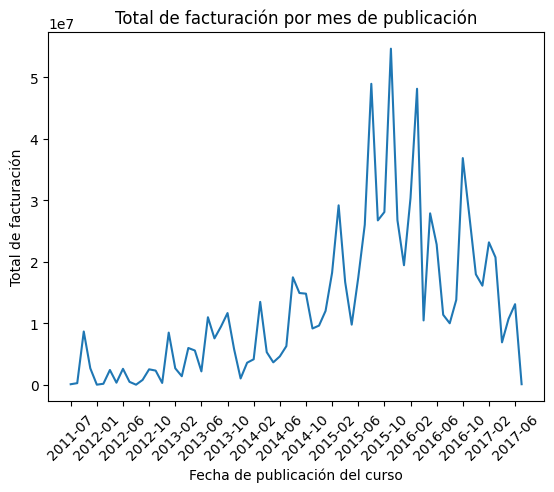

In [26]:
# Creo el gráfico de serie de tiempo
sns.lineplot(x='published_yyyymm', y='revenue', data=udemy_x_mes_df)

# Roto a 45 grados las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45)

# Me quedo sólo con algunos valores de las etiquetas del eje x para una mejor visibilidad
lista_indices_eje_x = []
ratio_eje_x = 4 # Imprimo etiquetas cada 4 valores en el eje x
for i in range(registros_max):
    if i % ratio_eje_x == 0:
        lista_indices_eje_x.append(i)
plt.xticks(lista_indices_eje_x, [etiquetas[i] for i in lista_indices_eje_x])

# Agrego etiquetas y título
plt.xlabel('Fecha de publicación del curso')
plt.ylabel('Total de facturación')
plt.title('Total de facturación por mes de publicación')

# Muestro el gráfico
plt.show()

- En ingresos totales, el valor aumenta con el tiempo, aunque da la sensación de que `el mejor rendimiento en facturación se alcanza luego de dos años de haber sido publicado el curso`.

Pregunta 3 : La oferta de cursos, aumenta o disminuye con el tiempo?

In [27]:
# Calculo el total de cursos por mes entre cursos gratuitos y cursos pagos
udemy_x_mes_df = udemy_df[['published_yyyymm', 'is_paid', 'course_title']].groupby(['is_paid', 'published_yyyymm'],as_index=False).count()
udemy_x_mes_df.sort_values(by=['published_yyyymm', 'is_paid'], inplace=True)

In [28]:
# Calculo cual es la máxima cantidad de registros a plotear en el eje x
registros_paid = udemy_x_mes_df[udemy_x_mes_df['is_paid'] == True].is_paid.count()
registros_free = udemy_x_mes_df[udemy_x_mes_df['is_paid'] == False].is_paid.count()
registros_max = max(registros_paid, registros_free)

# Y las etiquetas que deben imprimirse en el eje x
etiquetas = udemy_x_mes_df['published_yyyymm'].unique()
etiquetas = np.sort(etiquetas)

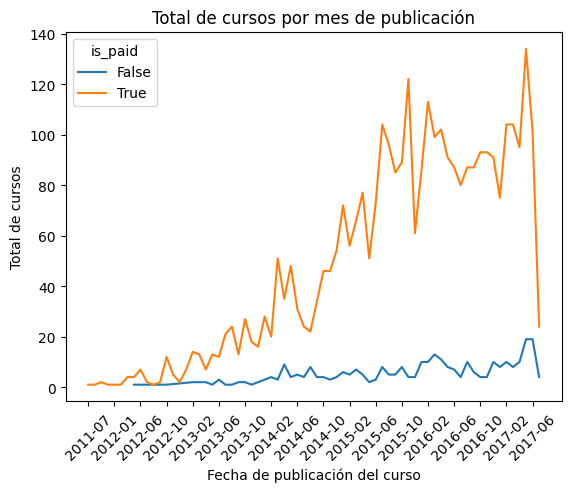

In [29]:
# Creo el gráfico de serie de tiempo
sns.lineplot(x='published_yyyymm', y='course_title', hue='is_paid', data=udemy_x_mes_df)

# Roto a 45 grados las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45)

# Me quedo sólo con algunos valores de las etiquetas del eje x para una mejor visibilidad
lista_indices_eje_x = []
ratio_eje_x = 4 # Imprimo etiquetas cada 4 valores en el eje x
for i in range(registros_max):
    if i % ratio_eje_x == 0:
        lista_indices_eje_x.append(i)
plt.xticks(lista_indices_eje_x, [etiquetas[i] for i in lista_indices_eje_x])

# Agrego etiquetas y título
plt.xlabel('Fecha de publicación del curso')
plt.ylabel('Total de cursos')
plt.title('Total de cursos por mes de publicación')

# Muestro el gráfico
plt.show()

- `El total de cursos pagos publicados por mes aumenta considerablemente` a medida que pasa el tiempo. Esto es un indicador de que quienes publican los cursos tienen alguna certeza de que recibirán beneficios.

# Conclusiones hasta aquí

- No hay mucha diferencia entre las palabras utilizadas en los títulos de los cursos gratuitos versus los de los cursos pagos.

> Cursos gratuitos: `Learn`, `How`, `Beginners`, Website, `Course`, `Guitar`, Introduction, `Web`, `Trading` y HTML

> Cursos pagos: `Learn`, `Trading`, `How`, `Web`, `Beginners`, Complete, `Course`, `Guitar`, Design y Piano

> Quizás esto indique que pudieran existir `versiones gratuitas de cursos pagos, que sirvan como enganche` para suscribir a los estudiantes a las versiones pagas.

- Varios cursos pagos superan las 10000 reviews (con hasta 25000 reviews) que es el máximo de reviews que tienen los cursos gratuitos.

- `Los cursos pagos suelen superar ampliamente la cantidad de lectures frente a los gratuitos` por hasta el doble o el triple del máximo de lectures en estos últimos.

- `La duración de los cursos pagos también suele superar a la de los cursos gratuitos` por hasta el cuádruple de estos últimos.

- No parece haber una relación lineal entre precio y duración del contenido. De hecho, se podría decir que en general, con independencia del precio, la duración del contenido está entre las "0" y 20 Hs.

- Tanto para los cursos gratuitos como para los cursos pagos, la cantidad de suscriptores aumenta cuanto más antiguo es el curso. Esto da un indicio de que la `cantidad de reviews (num_reviews) podría ser determinante para aumentar la cantidad de suscriptores`.

- La cantidad total de suscriptores pagos es bastante alta para cursos liberados entre mediados de 2015 y fines de 2016. Considerando que tenemos datos hasta Julio de 2017, `esto podría reforzar la idea de que los reviews previos podrían sustentar la adopción de los suscriptores por los cursos pagos`.

- Es interesante notar también que la suscripción a cursos gratuitos ha ido declinando a medida que la fecha de publicación del curso aumenta. Esto podría indicar que `la plataforma Udemy encontró una forma de ser más eficiente`.

- En ingresos totales, el valor aumenta con el tiempo, aunque da la sensación de que `el mejor rendimiento en facturación se alcanza luego de dos años de haber sido publicado el curso`.

- `El total de cursos pagos publicados por mes aumenta considerablemente` a medida que pasa el tiempo. Esto es un indicador de que quienes publican los cursos tienen alguna certeza de que recibirán beneficios.

## Veo distribuciones y busco outliers

In [32]:
# Me quedo con los datos numéricos que me interesan
udemy_numeric_df = udemy_df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']]

In [33]:
udemy_numeric_df.head()

,price,num_subscribers,num_reviews,num_lectures,content_duration
0,200,2147,23,51,1.5
1,75,2792,923,274,39.0
2,45,2174,74,51,2.5
3,95,2451,11,36,3.0
4,200,1276,45,26,2.0


In [37]:
def plotear_histograma(data: pd.DataFrame, columna: str):
    sns.histplot(data=data, x=columna)
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.title('Distribucion de {}'.format(columna))

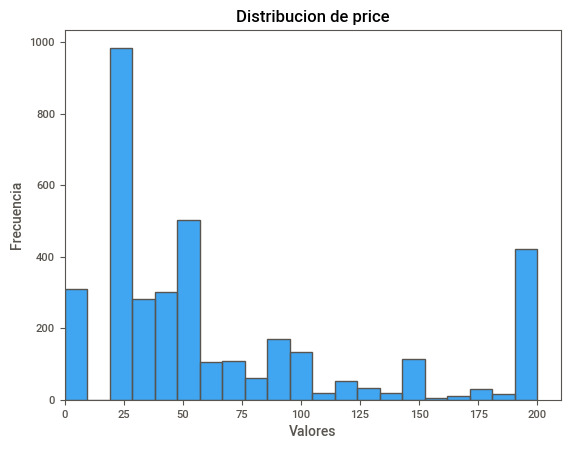

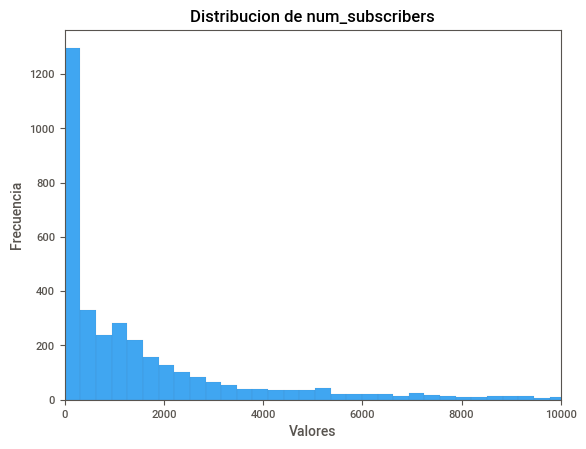

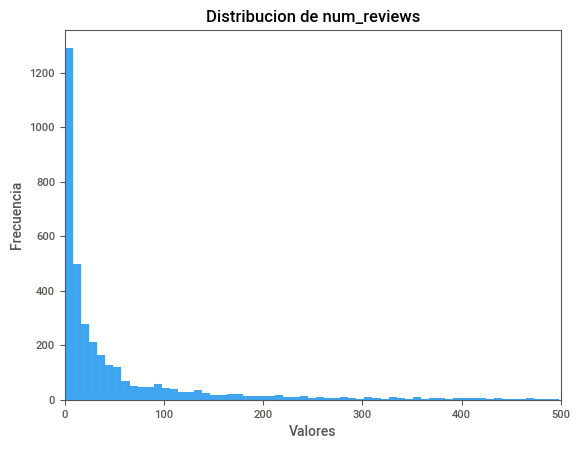

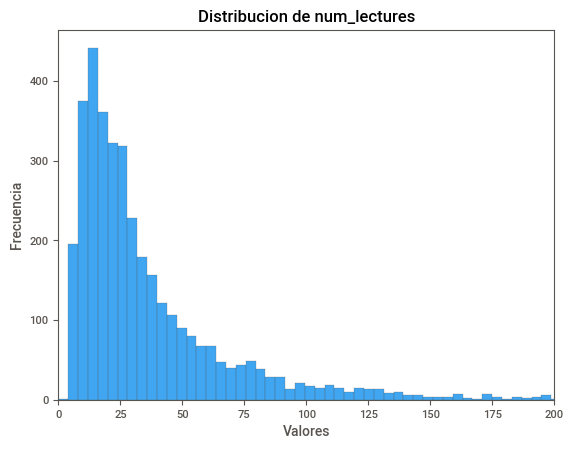

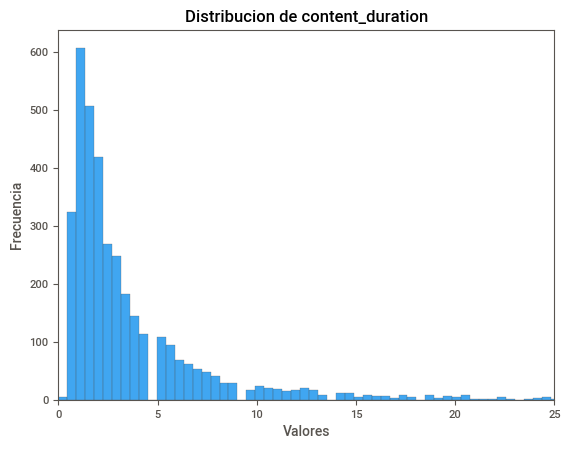

In [41]:
# Ploteo los histogramas
lista_col_y_val_max = [('price', 210), ('num_subscribers', 10000), ('num_reviews', 500), ('num_lectures', 200), ('content_duration', 25)]
for col_name, max_valor in lista_col_y_val_max:
    plotear_histograma(data=udemy_numeric_df, columna=col_name)
    plt.xlim(0, max_valor)
    plt.show()

- El grueso de los precios se encuentra en un rango de 25 a 50 usd, mientras que un segundo grupo menor en cantidad se encuentra en un rango de más de 50 usd y hasta 150 usd, y hay un tercer grupo cerca de los 200 usd. Me surge la pregunta de `cuál es el rango de precios que más colabora con el revenue?`.

Exploro cursos por idioma

In [63]:
# Preparo una funcion para detectar el idioma de un texto dado
def detect_language(text):
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    words = [word for word in words if word not in stopwords.words('english')]
    #fdist = FreqDist(words)
    lang_prob = detect_langs(text)

    return lang_prob

In [64]:
# Preparo una funcion para quedarme con el idioma con mayor probabilidad
def keep_most_probable_language(lang_prob_list: list):
    lang_prob_list = sorted(lang_prob_list, key=lambda x: x.prob, reverse=True)
    codigo_idioma = lang_prob_list[0].lang
    rta = langcodes.Language.make(codigo_idioma).language_name()
    return rta

In [65]:
# Preparo una funcion para detectar el idioma de una celda
def detect_language_in_cell(text: str):
    lang_prob_list = detect_language(text)
    lang_name = keep_most_probable_language(lang_prob_list)
    return lang_name

In [68]:
# Genero la columna de idioma detectado
udemy_df['detected_language'] = udemy_df['course_title'].apply(detect_language_in_cell)

In [73]:
# Veo como estan distribuidos los cursos por idioma
udemy_df['detected_language'].value_counts()

English                     3051
Spanish                      138
German                        92
Portuguese                    68
Catalan                       53
Italian                       48
French                        43
Norwegian                     40
Japanese                      29
Tagalog                       21
Dutch                         18
Swedish                       10
Arabic                         9
Afrikaans                      9
Romanian                       9
Danish                         8
Estonian                       6
Turkish                        4
Unknown language [zh-cn]       4
Croatian                       3
Russian                        3
Indonesian                     3
Swahili                        2
Polish                         2
Thai                           2
Vietnamese                     2
Korean                         1
Name: detected_language, dtype: int64

A simple vista, la mayoria de los cursos es en Inglés

In [77]:
# Calculo el porcentaje de cursos en otro idioma vs. en Inglés
cursos_en_ingles = udemy_df['detected_language'].value_counts()[0]
total_cursos = udemy_df['detected_language'].value_counts().sum()
cursos_otros_idiomas = total_cursos - cursos_en_ingles
particip_cursos_otros_idiomas = cursos_otros_idiomas / total_cursos

print('De un total de {} cursos hay {} cursos que se dictan en un idioma que no es el Inglés, representando un {} porciento del total'\
      .format(total_cursos, cursos_otros_idiomas, int(particip_cursos_otros_idiomas * 10000) / 100))

De un total de 3678 cursos hay 627 cursos que se dictan en un idioma que no es el Inglés, representando un 17.04 porciento del total
